In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input ,Dense
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()


x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255
x_train = x_train.reshape(x_train.shape[0],28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

normal_data = x_train[y_train ==1]

In [3]:
print(normal_data.shape)

(6742, 784)


In [4]:
input_dim = normal_data.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim,  activation='relu')(input_layer)

In [5]:
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

encoder_model = Model(inputs=input_layer, outputs=encoder)


In [6]:
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

autoencoder.fit(normal_data, normal_data, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50

27/27 [==============================] - 1s 7ms/step - loss: 0.1804
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0423
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0265
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0210
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0179
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0143
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 10/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 11/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0129
Epoch 12/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0125
Epoch 13/50
27/27 [=============================

313/313 [==============================] - 1s 2ms/step


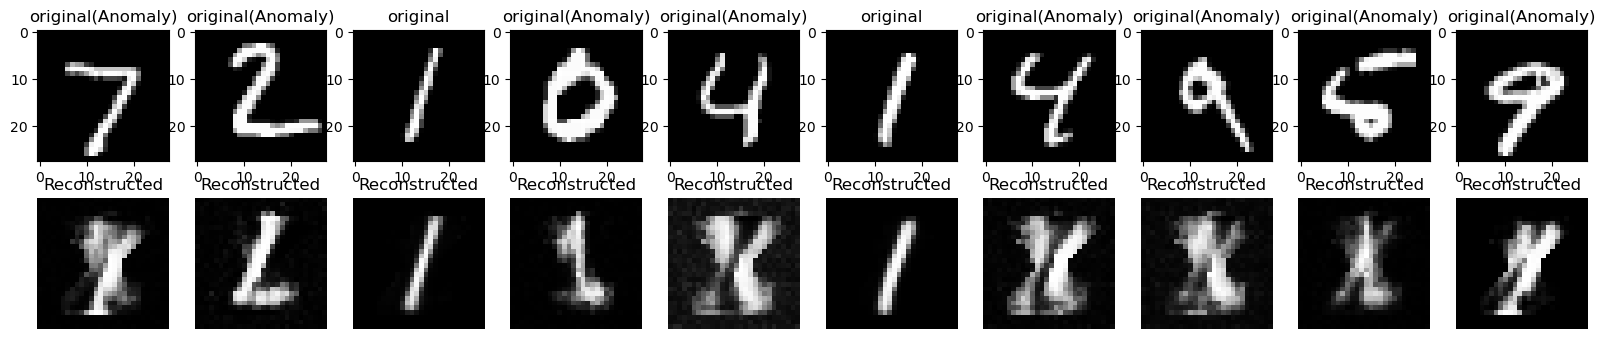

In [7]:
reconstructed = autoencoder.predict(x_test)

mse = np.mean(np.power(x_test - reconstructed ,2), axis=1)

threshold = 0.01 
anomalies = mse > threshold

n=10
plt.figure(figsize=(20 , 4))

for i in range(n):
    ax=plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("original" + ('(Anomaly)' if anomalies[i] else ""))

    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()